# Assignment: use RNNs to do Text classification, Text generation, Text summarization and Machine translation

Author: Long M. Luu

## Part 1: text summarization
The News20Group dataset will be downloaded. The job is to create a model that can summarize it.

## Download GloVe word vectors: LOAD THIS PART
Other options are:  
glove.6B.zip: from Wikipedia + Gigaword, 6B tokens, 400K vocab, uncased, 50d, 100d, 200d and 300d vectors, 822MB download  
glove.42B.300d.zip: from Common Crawl, 42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download  
glove.840B.300d.zip: from Common Crawl, 840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download  
glove.twitter.27B.zip: from Twitter, 2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download  

In [ ]:
%%capture
%%bash
wget http://nlp.stanford.edu/data/glove.6B.zip
unzip -q glove.6B.zip

--2020-08-11 00:51:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-08-11 00:51:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-08-11 00:51:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

     0K

Might took a while to download.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [ ]:
# Extract file to load word embeddings
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Print an example of word embedding
print(list(embeddings_index.items())[0])

('the', array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.

In [ ]:
# Print an example of word embedding
print(list(embeddings_index.items())[42])

('which', array([ 3.0240e-02,  4.4606e-01,  4.3166e-01, -3.7528e-01,  2.9068e-01,
        2.3032e-01,  1.8125e-01,  4.0201e-01,  1.3518e-01, -1.9562e-01,
        3.0639e-01, -1.3239e-01,  6.7897e-01,  4.2234e-01,  3.2637e-01,
       -1.5281e-01,  3.7698e-01, -2.3303e-01, -3.3817e-01,  3.0588e-01,
        4.4918e-01, -8.3624e-01,  5.9146e-01,  2.4958e-01,  3.9986e-01,
       -5.0172e-01, -2.3544e-01, -1.4696e-01, -3.5144e-01, -5.6852e-01,
        8.9540e-02,  8.2612e-01, -2.6586e-01,  3.9030e-01, -3.6849e-02,
        4.8257e-01,  7.1664e-01,  1.1004e-01, -5.9354e-01, -3.3216e-01,
       -2.5736e-01, -3.4531e-01, -2.6326e-02, -2.3747e-01,  1.9656e-04,
       -2.7480e-01,  3.8512e-01, -3.9581e-01,  1.1404e-01, -2.5174e-01,
       -3.2470e-01,  8.9608e-02,  2.4929e-01,  1.5127e+00, -1.9762e-01,
       -2.8509e+00, -5.3833e-01, -4.7111e-01,  1.7859e+00,  7.8126e-01,
       -1.2963e-01,  5.6077e-01,  3.2151e-01,  3.5571e-01,  8.4547e-01,
        1.4931e-01,  1.1487e-01,  3.0625e-01,  5.4774e

In [ ]:
# Get Newsground20 dataset
# It is News from BBC, categoried into 20 categories
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    extract=True,
)

17334272/17329808 [==============================] - 19s 1us/step


In [ ]:
import os
import pathlib

# Create directory and move corresponding label to that directory
os.listdir(pathlib.Path(data_path).parent)
data_dir = pathlib.Path(data_path).parent / "20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)

fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of directories: 20
Directory names: ['sci.space', 'sci.electronics', 'soc.religion.christian', 'comp.graphics', 'comp.sys.mac.hardware', 'rec.autos', 'talk.religion.misc', 'talk.politics.mideast', 'talk.politics.guns', 'talk.politics.misc', 'sci.med', 'rec.sport.hockey', 'comp.windows.x', 'misc.forsale', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'comp.os.ms-windows.misc', 'alt.atheism', 'rec.sport.baseball', 'rec.motorcycles']
Number of files in comp.graphics: 1000
Some example filenames: ['38308', '38558', '38360', '38963', '38696']


In [ ]:
# Read an example
print(open(data_dir / "comp.graphics" / "38987").read())

Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!agate!dog.ee.lbl.gov!network.ucsd.edu!usc!rpi!nason110.its.rpi.edu!mabusj
From: mabusj@nason110.its.rpi.edu (Jasen M. Mabus)
Subject: Looking for Brain in CAD
Message-ID: <c285m+p@rpi.edu>
Nntp-Posting-Host: nason110.its.rpi.edu
Reply-To: mabusj@rpi.edu
Organization: Rensselaer Polytechnic Institute, Troy, NY.
Date: Thu, 29 Apr 1993 23:27:20 GMT
Lines: 7

Jasen Mabus
RPI student

	I am looking for a hman brain in any CAD (.dxf,.cad,.iges,.cgm,etc.) or picture (.gif,.jpg,.ras,etc.) format for an animation demonstration. If any has or knows of a location please reply by e-mail to mabusj@rpi.edu.

Thank you in advance,
Jasen Mabus  



## Preprocess data

In [ ]:
# Delete headers, get class names and indicies
samples = []
labels = []
class_names = []
class_index = 0
for dirname in sorted(os.listdir(data_dir)):
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

print("Classes:", class_names)
print("Number of samples:", len(samples))

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.os.ms-windows.misc, 1000 files found
Processing comp.sys.ibm.pc.hardware, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.motorcycles, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.electronics, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.mideast, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
Classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.ha

In [ ]:
# Read a deleted header sample
print(samples[42], labels[42], class_names[labels[42]])


In article <114140@bu.edu>
jaeger@buphy.bu.edu (Gregg Jaeger) writes:
 
>>>>> In cases of prostitution
>>>>>both the man and the prostitute would be punished in public, quite
>>>>>severely.
 
(Deletion)
 
>
>>No Gregg, you cannot say A is lenient and A punishes severely in public.
>>Unless, of course, it is one of the exceptions implied by "almost all
>>matters".
>
>That depends on the statistics and who is punished in public. If some
>power (for example, nothing Islamic about it) allows men to rape women
>five times before blowing the rapist's head off in public then I'd call
>that leniency, wouldn't you?
>
 
You have given that example. It is not lenient. End of argument.
 
And chopping off the hands or heads of people is not lenient either. It
rather appears that you are internalized the claims about the legal system
without checking if they suit the description.
 
And wasn't the argument that it takes five men to rape a woman according
to Islamic law?
 
 
>>While I don't approve o

In [ ]:
"""
TODO 1: Preprocess data
For each element in "samples", call "preprocess" function for that element
Append all results in a list called processed_samples
"""

# Preprocess data function
def preprocess(data):
    '''
    Preprocess data: all characters are converted into lowercase and special characters are removed
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    Arguments:
        data: a string
    Returns:
        text: preprocessed version of "data"
    '''
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punct):
        for p in punct:
            text = text.replace(p, ' ')
        return text

    return clean_special_chars(data, punct)

### START CODE HERE
processed_samples = [preprocess(data) for data in samples]
### END CODE HERE

In [ ]:
# Unprocessed and processed data
print(samples[0], end="\n------------------\n")
print(processed_samples[0])

BR> From: wpr@atlanta.dg.com (Bill Rawlins)
BR> Newsgroups: alt.atheism
BR> Organization: DGSID, Atlanta, GA

BR>         The problem is that most scientists exclude the
BR> possibility of the         supernatural in the question of
BR> origins.  Is this is a fair premise?         I utterly
BR> reject the hypothesis that science is the highest form of   
BR>      truth.

It is better than the crap that the creationists put out.  So far all they
have been able to manage is distortions and half-truths. (When they are not
taking quotes out of context...)

BR>         Some of these so-called human-like creatures were
BR> apes.  Some were         humans.  Some were fancifully
BR> reconstructed from fragments. 

The genetic code has shown more about how man is realted to primates that the
fossil record.  (A little detail the creationists try and ignore.)

BR>            Good deeds do not justify a person in God's
BR> sight.            An atonement (Jesus) is needed to atone
BR> for sin.

Who

In [ ]:
# Split data intro valid and train
from sklearn.model_selection import train_test_split

train_samples, val_samples, train_labels, val_labels = train_test_split(processed_samples, labels,
                                                                        test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Calculate total number of samples, total number of words in sample, and average number of words in each sample
num_words = [len(x.split()) for x in processed_samples]
print('The total number of samples is', len(processed_samples))
print('The total number of words in the files is', sum(num_words))
print('The average number of words in the files is', sum(num_words)/len(num_words))

The total number of samples is 19997
The total number of words in the files is 5863640
The average number of words in the files is 293.2259838975846


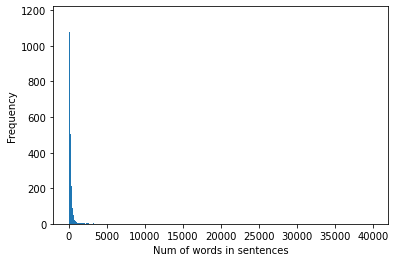

In [ ]:
# Plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_words, bins="auto")
plt.xlabel('Num of words in sentences')
plt.ylabel('Frequency')
plt.show()

Given the Histogram plot, it is reasonable to choose max sentence length = 600

In [ ]:
"""
TODO 2: Create vocabulary index with TextVectorization
https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization
Let: max_tokens = vocab_size, output_sequence_length = max_sentence_length

Then, create text_dataset by calling tf Dataset.from_tensor_slices
https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices
Then call function batch() of "text_dataset", and pass in batch_size

Call function adapt() of vectorizer, pass text_dataset to the parameter.
"""

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vocab_size = 20000 # Only take top 20k words of the vocab
max_sentence_length = 400 # Max input length, exceeded words will be padded
batch_size = 64 

### START CODE HERE
vectorizer = TextVectorization(max_tokens=vocab_size, output_sequence_length=max_sentence_length)
text_dataset = tf.data.Dataset.from_tensor_slices(processed_samples).batch(batch_size)
### END CODE HERE

vectorizer.adapt(text_dataset)

In [ ]:
vectorizer.get_vocabulary()[:10] # Get 10 examples of vocabulary

['', '[UNK]', 'the', 'to', 'of', 'a', 'and', 'i', 'in', 'is']

In [ ]:
# Sample sentence that is vectorzied
sample_output = vectorizer(np.array([["I am learning text vectorization"]]))
sample_output.numpy()[0, :10]

array([   7,  115, 2888,  660,    1,    0,    0,    0,    0,    0])

In [ ]:
voc = vectorizer.get_vocabulary()
print(len(voc))
word_index = dict(zip(voc, range(2, len(voc))))
print(list(word_index.items())[:10])

20000
[('', 2), ('[UNK]', 3), ('the', 4), ('to', 5), ('of', 6), ('a', 7), ('and', 8), ('i', 9), ('in', 10), ('is', 11)]


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 18114 words (1884 misses)


In [ ]:
epochs=50
model_cp = tf.keras.callbacks.ModelCheckpoint("model_cp", monitor="val_loss", save_format="tf", save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                              patience=epochs//10, restore_best_weights=True)

## Create a simple RNN model

In [ ]:
"""
TODO 3: create a model
The layers of Sequential are as follows:
Input, has shape (1, ), and dtype is tf.string: https://www.tensorflow.org/api_docs/python/tf/keras/Input?hl=en
"vectorizer" variable (TextVectorization layer defined above)
Embedding layer: input_dim is "num_tokens", output dim is "embedding_dim", embeddings_initializer is Contstant(embedding_matrix), set trainable=False
SimpleRNN, 100 units, return_sequences is True: https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN?hl=en
SimpleRNN, 50 units
Dense, 128 units, activation tanh
Dense, 64 units, activation tanh
Dense, len(class_names), activation softmax
"""

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.initializers import Constant

# Sample model 1: normal RNN
def create_simple_rnn_model():
    model = Sequential([
        Input(shape=(1, ), dtype=tf.string),
        vectorizer,
        Embedding(num_tokens, embedding_dim, 
                  embeddings_initializer=Constant(embedding_matrix), trainable=False),
        SimpleRNN(100, return_sequences=True),
        SimpleRNN(50),
        Dense(128, activation="tanh"),
        Dense(64, activation="tanh"),
        Dense(len(class_names), activation="softmax")                  
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

simple_rnn_model = create_simple_rnn_model()
simple_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 400)               0         
_________________________________________________________________
embedding (Embedding)        (None, 400, 100)          2000200   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 400, 100)          20100     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                7550      
_________________________________________________________________
dense (Dense)                (None, 128)               6528      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1

In [ ]:
history_1 = simple_rnn_model.fit(train_samples, train_labels, 
                                 batch_size=128, epochs=epochs, validation_data=(val_samples, val_labels), 
                                 callbacks=[model_cp, early_stop])

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 2.9888 - accuracy: 0.0621WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_cp/assets
125/125 [==============================] - 79s 633ms/step - loss: 2.9888 - accuracy: 0.0621 - val_loss: 2.9848 - val_accuracy: 0.0690
Epoch 2/50
125/125 [==============================] - 79s 632ms/step - loss: 2.9726 - accuracy: 0.0694 - val_loss: 2.9753 - val_accuracy: 0.0655
Epoch 3/50
125/125 [==============================] - 80s 639ms/step - loss: 2.9663 - accuracy: 0.0735 

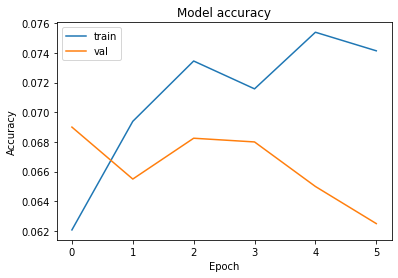

In [ ]:
# Plot accuracy vs epoch
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

## Create a Bidirectional with GRU

In [ ]:
"""
TODO 4: create a bidirectional model
The layers of Sequential are as follows:
Input, has shape (1, ), and dtype is tf.string: https://www.tensorflow.org/api_docs/python/tf/keras/Input?hl=en
"vectorizer" variable (TextVectorization layer defined above)
Embedding layer: input_dim is "num_tokens", output dim is "embedding_dim", embeddings_initializer is Contstant(embedding_matrix), set trainable=False
Bidirectional GRU, 128 units, return_sequences is True: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional
Bidirectional GRU, 64 units
Dense, 64 units, activation tanh
Dense, len(class_names), activation softmax
"""

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, GRU, Bidirectional

# Sample model 2: Bidirectional with GRU
def create_bidi_gru_model():
    model = Sequential([
        Input(shape=(1, ), dtype=tf.string),
        vectorizer,
        Embedding(num_tokens, embedding_dim, 
                  embeddings_initializer=Constant(embedding_matrix), trainable=False),
        Bidirectional(GRU(128, return_sequences=True)),
        Bidirectional(GRU(64)),
        Dense(64, activation="tanh"),
        Dense(len(class_names), activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

bidi_gru_model = create_bidi_gru_model()
bidi_gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 400)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 400, 100)          2000200   
_________________________________________________________________
bidirectional (Bidirectional (None, 400, 256)          176640    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               123648    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1300      
Total params: 2,310,044
Trainable params: 309,844
Non-trainable params: 2,000,200
______________________________________

In [ ]:
model_cp2 = tf.keras.callbacks.ModelCheckpoint("model_cp", monitor="val_loss", save_format="tf", save_best_only=True)

In [ ]:
history_2 = bidi_gru_model.fit(train_samples, train_labels, 
                               batch_size=128, epochs=10, validation_data=(val_samples, val_labels),
                               callbacks=[model_cp2])

Epoch 1/10
125/125 [==============================] - 46s 368ms/step - loss: 2.8423 - accuracy: 0.1213 - val_loss: 2.7810 - val_accuracy: 0.1308
Epoch 2/10
125/125 [==============================] - 43s 343ms/step - loss: 2.6290 - accuracy: 0.1817 - val_loss: 2.5895 - val_accuracy: 0.1850
Epoch 3/10
125/125 [==============================] - 43s 346ms/step - loss: 2.3843 - accuracy: 0.2517 - val_loss: 2.3884 - val_accuracy: 0.2440
Epoch 4/10
125/125 [==============================] - 43s 344ms/step - loss: 2.1512 - accuracy: 0.3175 - val_loss: 2.2521 - val_accuracy: 0.2788
Epoch 5/10
125/125 [==============================] - 43s 345ms/step - loss: 1.9180 - accuracy: 0.3818 - val_loss: 2.0697 - val_accuracy: 0.3383
Epoch 6/10
125/125 [==============================] - 43s 343ms/step - loss: 1.7053 - accuracy: 0.4444 - val_loss: 1.9070 - val_accuracy: 0.3913
Epoch 7/10
125/125 [==============================] - 43s 344ms/step - loss: 1.5019 - accuracy: 0.5135 - val_loss: 1.8528 - val_ac

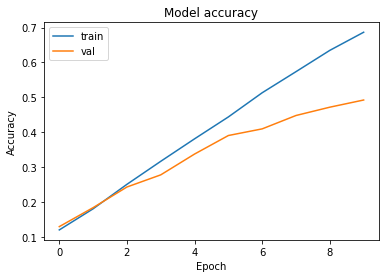

In [ ]:
# Plot accuracy vs epoch
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
class_names[np.argmax(bidi_gru_model.predict(np.array([["The PC performance is very bad. You should buy a laptop instead."]])))]

'sci.med'

In [ ]:
# Create your custom model

def create_custom_model():
    model = None
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

custom_model = create_custom_model()
custom_model.summary()

In [ ]:
model_cp3 = tf.keras.callbacks.ModelCheckpoint("model_cp", 
                                               monitor="val_loss", save_format="tf", save_best_only=True)

In [ ]:
history_3 = custom_model.fit(train_samples, train_labels, 
                               batch_size=128, epochs=10, validation_data=(val_samples, val_labels),
                             callbacks=[model_cp3, early_stop])